In [13]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
repo_dir = os.path.dirname(os.getcwd())
# os.path.join(repo_dir, "data", "processed", "train_data.npz")

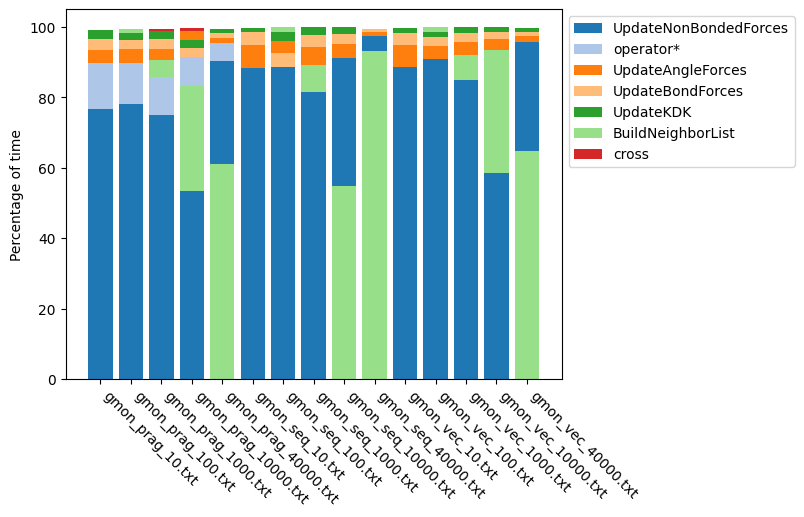

In [54]:
file_dir = os.path.join(repo_dir, '698afdbfe1df1f213974a0ea', 'GMON')
files = os.listdir(file_dir)#[f for f in os.listdir(file_dir) if f.removesuffix('.txt')[-2:] != "10"]

fig, ax = plt.subplots()

color_map = {}  # Dictionary to store unique names and their assigned colors
color_cycle = plt.cm.tab20.colors  # Use a colormap for consistent colors
color_index = 0

for file in files:
    with open(os.path.join(file_dir, file)) as f:
        read_file = f.read()
        
    cols = [c for c in read_file.split('\n')[4].split(" ") if c != '']
    cols
    df = pd.DataFrame(columns=cols)

    i = 5
    rows = read_file.split('\n')
    
    while rows[i] != '':
        function = rows[i].split("  ")[-1]
        if function.startswith('void std::__adjust_heap<__gnu_cxx:'):
            function = 'BuildNeighborList(System&)'
        values = [float(v) for v in rows[i].split(" ") if v != '' and v.split(".")[0].isdigit()]

        if len(values) != len(cols):
            values += [np.nan]*(len(cols)-len(values)-1)
            
        values.append(function)
        df.loc[len(df)] = values
        i += 1
    df = df.groupby('name').sum().sort_values('time', ascending=False).reset_index()
    names = [n[:40] for n in df['name']]

    mask = df['time'].cumsum() < 99
    mask |= mask.shift(1, fill_value=False)
    if mask.sum() == 0:
        mask[0] = True
    
    bottom = 0
    for height, name in zip(df[mask]["time"], df[mask]["name"]):
        if name not in color_map:
            color_map[name] = color_cycle[color_index % len(color_cycle)]
            color_index += 1
        ax.bar(file, height, label=name.split("(")[0], bottom=bottom, color=color_map[name])
        bottom += height

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates in the legend
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))

plt.ylabel("Percentage of time")
plt.xticks(rotation=-45, ha='left')
plt.savefig(os.path.join(repo_dir, "698afdbfe1df1f213974a0ea", "gmon_bar_chart.svg"), bbox_inches='tight')

,name,time,seconds,seconds,calls,s/call,s/call
0,BuildNeighborList(System&),64.82,26.32,11.46,72407875.0,4.71,5.74
1,UpdateNonBondedForces(System&),30.83,14.86,5.45,200.0,0.03,0.03
2,UpdateAngleForces(System&),1.87,17.24,0.33,200.0,0.00,0.00
3,UpdateBondForces(System&),1.13,17.44,0.20,200.0,0.00,0.00
4,"UpdateKDK(System&, Sim_Configuration&)",1.07,17.63,0.19,200.0,0.00,0.00
5,MakeWater(unsigned long),0.17,17.66,0.03,1.0,0.03,0.04
6,"void std::vector<unsigned long, std::allocator...",0.06,17.67,0.01,121331.0,0.00,0.00
7,Atoms::Atoms(Atoms const&),0.06,17.68,0.01,1.0,0.01,0.01
8,Molecules::~Molecules(),0.00,17.68,0.00,1.0,0.00,0.00
9,Sim_Configuration::Sim_Configuration(std::vect...,0.00,17.68,0.00,1.0,0.00,0.00
